This data set consists of Placement data of students in a campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading Dataset 

In [2]:
df = pd.read_excel('Placement_Data_Full_Class.xlsx')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.shape

(215, 15)

## Checking Null Values

In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Only Salary column has some null values for those students who were not placed. Anyways this column is not required to predict the placement status. Also, sl_no column is not required. Therefore, dropping both of them

In [5]:
df.drop(columns=['sl_no','salary'], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
df.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [8]:
df.specialisation.unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

## Bivariate Categorical Analysis 

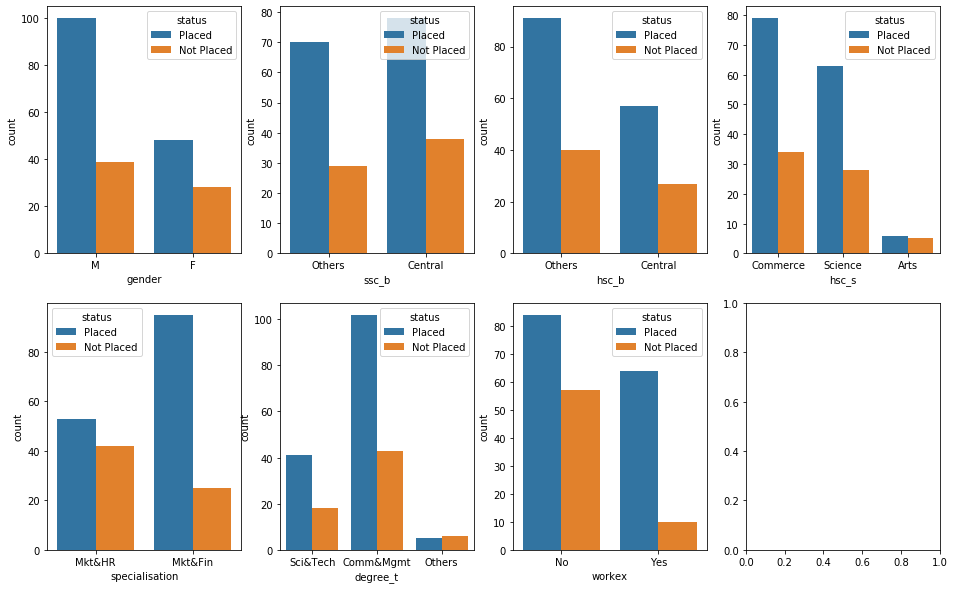

In [9]:
fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(data = df, x = 'gender', hue = 'status', ax=ax[0,0])
sns.countplot(data = df, x = 'ssc_b', hue = 'status', ax=ax[0,1])
sns.countplot(data = df, x = 'hsc_b', hue = 'status', ax=ax[0,2])
sns.countplot(data = df, x = 'hsc_s', hue = 'status', ax=ax[0,3])
sns.countplot(data = df, x = 'degree_t', hue = 'status', ax=ax[1,1])
sns.countplot(data = df, x = 'workex', hue = 'status', ax=ax[1,2])
sns.countplot(data = df, x = 'specialisation', hue = 'status', ax=ax[1,0])
plt.show()

1. From the graphs above, we can say that around 100 students are placed from commerce background
2. Also, Specialisation in marketing and finance helped students in getting placed
3. Students having workex are mostly placed.

## Analysis of Status of Placement on the basis of percentage scored in different examinations 

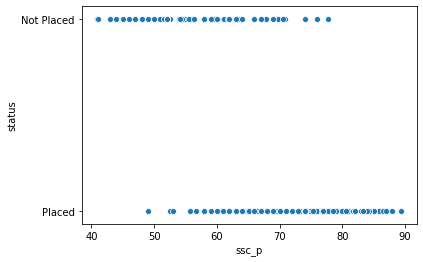

In [10]:
sns.scatterplot(x='ssc_p', y='status', data=df)
plt.show()

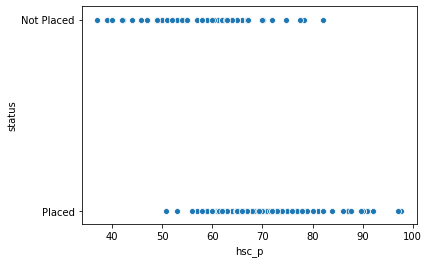

In [11]:
sns.scatterplot(x='hsc_p', y='status', data=df)
plt.show()

From above ssc_p and hsc_p graphs, we can say that Students having more than 80% surely got placed, while below 50% surely didn't get placed

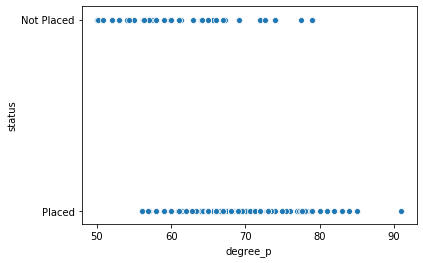

In [12]:
sns.scatterplot(x='degree_p', y='status', data=df)
plt.show()

In degree program students having less than 55% surely didn't get placed whereas having more that 80% surely got placed.

## Checking correlation among features 

In [13]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


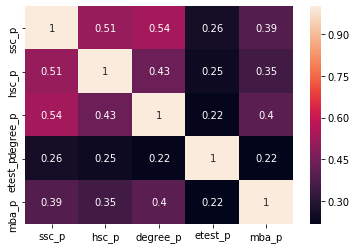

In [14]:
ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Hypothesis Testing for Feature Engineering 

### Chi Square test for independence

In [15]:
def testing(feature): 
    table = pd.crosstab(feature, df.status)
    statistic, Pvalue, dof, array = stats.chi2_contingency(table)
    print(" Pvalue", Pvalue)
    print(" test statistic", statistic)
    print(" degree of freedom", dof)

    if(Pvalue < 0.05):
        print("Reject the null hypothesis meaning Placement is dependent on this feature")
    else:
        print("We fail to reject null hypothesis meaning, Placement is independent of this feature")

### Is Placement dependent on the Gender?

H0 : Placement is independent of the Gender

H1 : Alternate of null hypothesis

Alpha : 0.05

In [16]:
testing(df.gender)

 Pvalue 0.23980260881037566
 test statistic 1.3817539668505108
 degree of freedom 1
We fail to reject null hypothesis meaning, Placement is independent of this feature


### Is Placement dependent on the workex?

H0 : Placement is independent of the workex

H1 : Alternate of null hypothesis

Alpha : 0.05

In [17]:
testing(df.workex)

 Pvalue 9.906584720516494e-05
 test statistic 15.154425347637423
 degree of freedom 1
Reject the null hypothesis meaning Placement is dependent on this feature


### Is Placement dependent on the SSC board?

H0 : Placement is independent of the SSC board

H1 : Alternate of null hypothesis

Alpha : 0.05

In [18]:
testing(df.ssc_b)

 Pvalue 0.6897729431530739
 test statistic 0.15933127499487468
 degree of freedom 1
We fail to reject null hypothesis meaning, Placement is independent of this feature


### Is Placement dependent on the HSC board?

H0 : Placement is independent of the HSC board

H1 : Alternate of null hypothesis

Alpha : 0.05

In [19]:
testing(df.hsc_b)

 Pvalue 0.9222837052885
 test statistic 0.009517458006762429
 degree of freedom 1
We fail to reject null hypothesis meaning, Placement is independent of this feature


### Is Placement dependent on the HSC Specialisation?

H0 : Placement is independent of the HSC specialisation

H1 : Alternate of null hypothesis

Alpha : 0.05

In [20]:
testing(df.hsc_s)

 Pvalue 0.5727118511343621
 test statistic 1.114745132708414
 degree of freedom 2
We fail to reject null hypothesis meaning, Placement is independent of this feature


### Is Placement dependent on the UG Degree type?

H0 : Placement is independent of the UG Degree type

H1 : Alternate of null hypothesis

Alpha : 0.05

In [21]:
testing(df.degree_t)

 Pvalue 0.22661076190356658
 test statistic 2.9690428771222925
 degree of freedom 2
We fail to reject null hypothesis meaning, Placement is independent of this feature


### Is Placement dependent on the UG Degree Specialisation?

H0 : Placement is independent of the UG Degree specialisation

H1 : Alternate of null hypothesis

Alpha : 0.05

In [22]:
testing(df.specialisation)

 Pvalue 0.00042018425858864284
 test statistic 12.440229009203623
 degree of freedom 1
Reject the null hypothesis meaning Placement is dependent on this feature


#### From above Hypothesis testing, we can say that Placement of a student is only dependent on Specialisation in UG Degree and Work experience of a student


### Anova test

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.get_dummies(data = df, columns = ['status'], drop_first = True)

model = ols("status_Placed~ssc_p+hsc_p+degree_p+etest_p+mba_p", data = df).fit()
table = sm.stats.anova_lm(model)
print(table)

             df     sum_sq    mean_sq           F        PR(>F)
ssc_p       1.0  17.043008  17.043008  154.358483  6.679646e-27
hsc_p       1.0   2.030707   2.030707   18.392110  2.746636e-05
degree_p    1.0   0.883414   0.883414    8.001080  5.130014e-03
etest_p     1.0   0.239874   0.239874    2.172539  1.419987e-01
mba_p       1.0   2.847847   2.847847   25.792945  8.400591e-07
Residual  209.0  23.076080   0.110412         NaN           NaN


#### From the Anova test, we can say that all the features are significant in determining the Placement except for the "etest_p"

## Modelling, keeping all the Features

In [24]:
columns = ['gender','ssc_b','hsc_b','hsc_s','specialisation','degree_t','workex']
data = pd.get_dummies(data = df, columns = columns, drop_first = True)

In [25]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status_Placed,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,specialisation_Mkt&HR,degree_t_Others,degree_t_Sci&Tech,workex_Yes
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,1,0,1,0,1,0
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1,0,0,1,1
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,1,0,0,0,1,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,1,0,0,0,0,0


In [26]:
X = data.drop(columns = 'status_Placed')
Y = data['status_Placed']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Decision Tree

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
pred1 = dt.predict(X_test)

In [31]:
print("accuracy",accuracy_score(pred1, Y_test))
print(confusion_matrix(pred1, Y_test))

accuracy 0.8604651162790697
[[ 6  0]
 [ 6 31]]


## Random Forest

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

C:\Users\Win\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
pred2 = rf.predict(X_test)

In [34]:
print("accuracy", accuracy_score(pred2, Y_test))
print(confusion_matrix(pred2, Y_test))

accuracy 0.8837209302325582
[[ 9  2]
 [ 3 29]]


## Modelling after dropping insignificant features

In [35]:
columns = ['specialisation','workex']
data_new = pd.get_dummies(data = df, columns = columns, drop_first = True)
data_new.drop(columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t', 'etest_p'], inplace = True)

data_new.head()

,ssc_p,hsc_p,degree_p,mba_p,status_Placed,specialisation_Mkt&HR,workex_Yes
0,67.00,91.00,58.00,58.80,1,1,0
1,79.33,78.33,77.48,66.28,1,0,1
2,65.00,68.00,64.00,57.80,1,0,0
3,56.00,52.00,52.00,59.43,0,1,0
4,85.80,73.60,73.30,55.50,1,0,0


In [36]:
X_new = data_new.drop(columns = 'status_Placed')
Y_new = data_new['status_Placed']

In [37]:
from sklearn.model_selection import train_test_split
X_newtrain, X_newtest, Y_newtrain, Y_newtest = train_test_split(X_new, Y_new, test_size = 0.2)

## Decision Tree

In [38]:
dt_new = DecisionTreeClassifier()
dt_new.fit(X_newtrain, Y_newtrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
pred3 = dt_new.predict(X_newtest)

In [40]:
print("accuracy",accuracy_score(pred3, Y_newtest))
print(confusion_matrix(pred3, Y_newtest))

accuracy 0.8372093023255814
[[10  2]
 [ 5 26]]


## Random Forest

In [41]:
rf_new = RandomForestClassifier()
rf_new.fit(X_newtrain, Y_newtrain)

C:\Users\Win\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
pred_new = rf_new.predict(X_newtest)

In [43]:
print("accuracy",accuracy_score(pred_new, Y_newtest))
print(confusion_matrix(pred_new, Y_newtest))

accuracy 0.7906976744186046
[[10  4]
 [ 5 24]]
